In [5]:
data = pd.read_csv('moore.csv', delimiter='\t',
                   names = ['Model', 'Transistors', 'Year', 'Company', 'TS', 'area'])

data['Year'] = data['Year'].apply(lambda x: int(x.split('[')[0]))

def transistor_cleaner(s):
    s = s.replace(',', '')
    s = s.replace('~', '')
    s = s.replace(' ', '')
    
    for c in s:
        if c.isalpha():
            s = s.replace(c, '')
    
    s = float(s.split('[')[0])
    return s

data['Transistors'] = data['Transistors'].apply(transistor_cleaner)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Model        102 non-null    object 
 1   Transistors  102 non-null    float64
 2   Year         102 non-null    int64  
 3   Company      102 non-null    object 
 4   TS           97 non-null     object 
 5   area         95 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.9+ KB


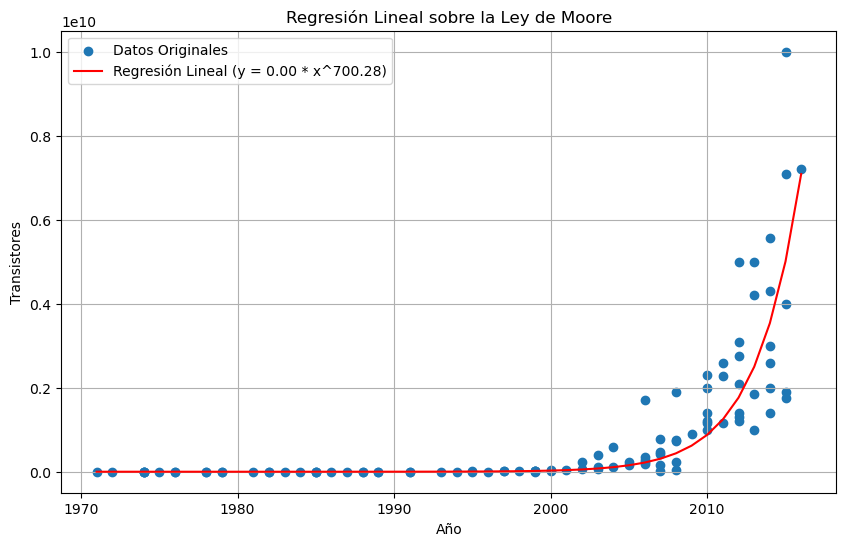

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


df = pd.DataFrame(data)

# Ajuste de modelo lineal en escala logarítmica
x = df['Year'].values.reshape(-1, 1)
y = df['Transistors'].values.reshape(-1, 1)

# Transformar los datos a escala logarítmica
x_log = np.log(x)
y_log = np.log(y)

# Ajustar el modelo lineal
model = LinearRegression()
model.fit(x_log, y_log)

# Coeficientes del modelo
slope = model.coef_[0][0]
intercept = model.intercept_[0]

# Predicción del modelo
y_pred_log = model.predict(x_log)
y_pred = np.exp(y_pred_log)

# Graficar el modelo junto con los datos
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['Transistors'], label='Datos Originales')
plt.plot(df['Year'], y_pred, color='red', label=f'Regresión Lineal (y = {np.exp(intercept):.2f} * x^{slope:.2f})')
plt.xlabel('Año')
plt.ylabel('Transistores')
plt.title('Regresión Lineal sobre la Ley de Moore')
plt.legend()
plt.grid(True)
plt.show()